In [72]:

import os
import yaml
import importlib
import numpy as np
from AmbiSplice import visuals
importlib.reload(visuals)

def load_model_dataset_metrics(model_dataset_paths):
    model_dataset_metrics = {}
    for model, dataset_paths in model_dataset_paths.items():
        dataset_metrics = {}
        for dataset, yaml_path in dataset_paths.items():
            with open(yaml_path, 'r') as f:
                dataset_metrics[dataset] = yaml.safe_load(f)
        model_dataset_metrics[model] = dataset_metrics
    return model_dataset_metrics

def plot_model_dataset_metrics(model_dataset_metrics, ys=['cls_loss', 'psi_loss', 'cls_f1', 'psi_mse', 'auprc', 'auroc'], save_prefix=None, display=True):
    import matplotlib.pyplot as plt
    
    fig = plt.figure(figsize=(12, 8))

    model_names = list(model_dataset_metrics.keys())
    dataset_names = list(model_dataset_metrics[model_names[0]].keys())
    n_models = len(model_dataset_metrics)
    n_datasets = len(model_dataset_metrics[model_names[0]])

    for i, y in enumerate(ys):
        plt.subplot((len(ys) + 1) // 2, 2, i + 1)
        plt.title(f'{y}')
        xpos = np.arange(n_datasets)
        for j, model in enumerate(model_names):
            dataset_metrics = model_dataset_metrics[model]

            yval = [dataset_metrics[dataset][y] for dataset in dataset_names]
            plt.bar(xpos + ((j+0.5) / n_models - 0.5)*0.85, yval, width=1/(n_models + 1)*0.9, align='center', alpha=0.7, label=model)
        plt.xticks(xpos, dataset_names)
        plt.ylabel(y)
        if y.endswith('loss'):
            plt.yscale('log')
        plt.grid()
        plt.tight_layout()

    # add model_names as legends at the top of the entire figure
    fig.legend(model_names, loc='upper center', bbox_to_anchor=(0.5, 0.01), ncol=5)
    fig.tight_layout()
    if save_prefix:
        out_png = f'{save_prefix}_model_dataset_metrics.png'
        plt.savefig(out_png)
        print(f'Saved figure to {out_png}')
    if display:
        plt.show()

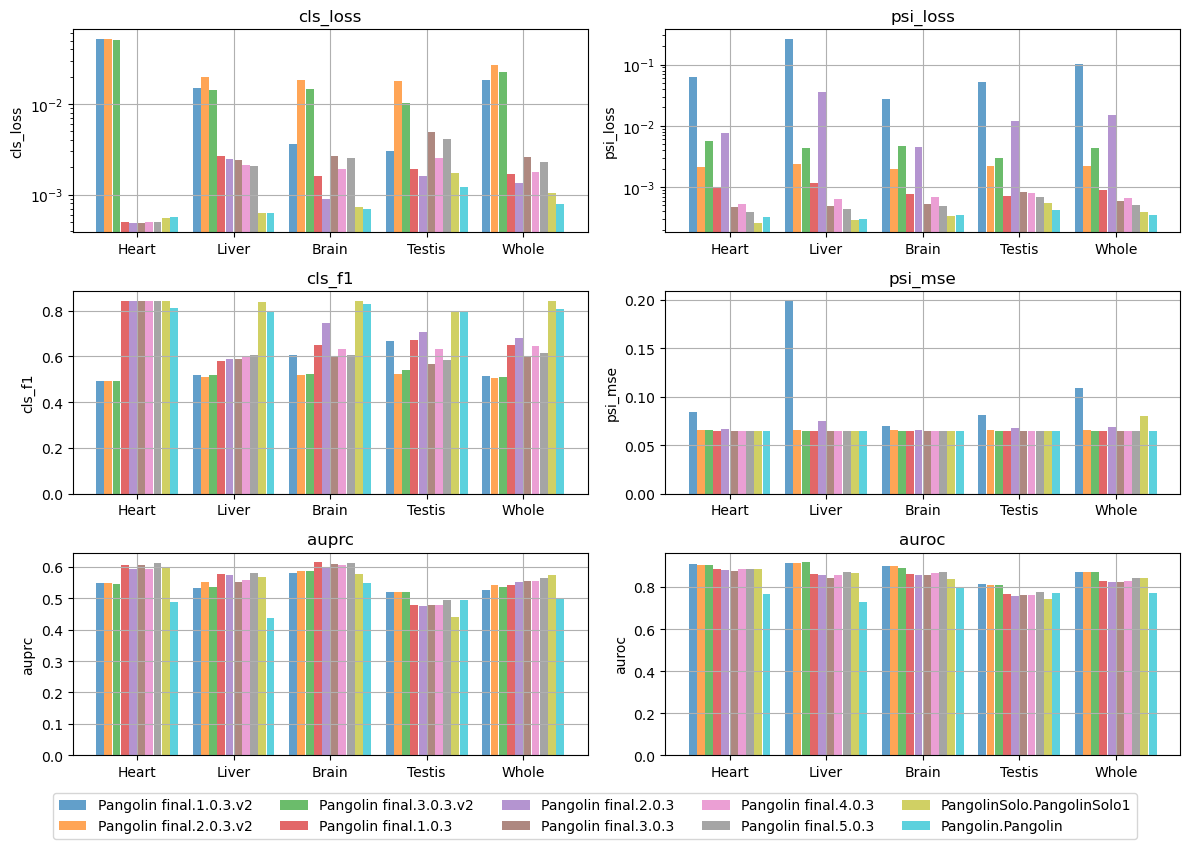

In [81]:
pangolinsolo_pangolinsolo1_dir = 'checkpoints/pangolinsolo.pangolinsolo1_2025-10-25_11-46-07_cqw6jfnv'
pangolin_pangolin_dir = 'checkpoints/pangolin.pangolin_2025-10-21_22-16-17_mnsgbck4'
model_dataset_paths = {
    'Pangolin final.1.0.3.v2': {
        'Heart':  'benchmarks/pangolin_final.1.0.3.v2/pangolin_test_agg_metrics_dim0.yaml',
        'Liver':  'benchmarks/pangolin_final.1.0.3.v2/pangolin_test_agg_metrics_dim1.yaml',
        'Brain':  'benchmarks/pangolin_final.1.0.3.v2/pangolin_test_agg_metrics_dim2.yaml',
        'Testis': 'benchmarks/pangolin_final.1.0.3.v2/pangolin_test_agg_metrics_dim3.yaml',
        'Whole':  'benchmarks/pangolin_final.1.0.3.v2/pangolin_test_agg_metrics.yaml',
    },
    'Pangolin final.2.0.3.v2': {
        'Heart':  'benchmarks/pangolin_final.2.0.3.v2/pangolin_test_agg_metrics_dim0.yaml',
        'Liver':  'benchmarks/pangolin_final.2.0.3.v2/pangolin_test_agg_metrics_dim1.yaml',
        'Brain':  'benchmarks/pangolin_final.2.0.3.v2/pangolin_test_agg_metrics_dim2.yaml',
        'Testis': 'benchmarks/pangolin_final.2.0.3.v2/pangolin_test_agg_metrics_dim3.yaml',
        'Whole':  'benchmarks/pangolin_final.2.0.3.v2/pangolin_test_agg_metrics.yaml',
    }, 
    'Pangolin final.3.0.3.v2': {
        'Heart':  'benchmarks/pangolin_final.3.0.3.v2/pangolin_test_agg_metrics_dim0.yaml',
        'Liver':  'benchmarks/pangolin_final.3.0.3.v2/pangolin_test_agg_metrics_dim1.yaml',
        'Brain':  'benchmarks/pangolin_final.3.0.3.v2/pangolin_test_agg_metrics_dim2.yaml',
        'Testis': 'benchmarks/pangolin_final.3.0.3.v2/pangolin_test_agg_metrics_dim3.yaml',
        'Whole':  'benchmarks/pangolin_final.3.0.3.v2/pangolin_test_agg_metrics.yaml',
    },        
    'Pangolin final.1.0.3': {
        'Heart':  'benchmarks/pangolin_final.1.0.3/pangolin_test_agg_metrics_dim0.yaml',
        'Liver':  'benchmarks/pangolin_final.1.0.3/pangolin_test_agg_metrics_dim1.yaml',
        'Brain':  'benchmarks/pangolin_final.1.0.3/pangolin_test_agg_metrics_dim2.yaml',
        'Testis': 'benchmarks/pangolin_final.1.0.3/pangolin_test_agg_metrics_dim3.yaml',
        'Whole':  'benchmarks/pangolin_final.1.0.3/pangolin_test_agg_metrics.yaml',
    },
    'Pangolin final.2.0.3': {
        'Heart':  'benchmarks/pangolin_final.2.0.3/pangolin_test_agg_metrics_dim0.yaml',
        'Liver':  'benchmarks/pangolin_final.2.0.3/pangolin_test_agg_metrics_dim1.yaml',
        'Brain':  'benchmarks/pangolin_final.2.0.3/pangolin_test_agg_metrics_dim2.yaml',
        'Testis': 'benchmarks/pangolin_final.2.0.3/pangolin_test_agg_metrics_dim3.yaml',
        'Whole':  'benchmarks/pangolin_final.2.0.3/pangolin_test_agg_metrics.yaml',
    }, 
    'Pangolin final.3.0.3': {
        'Heart':  'benchmarks/pangolin_final.3.0.3/pangolin_test_agg_metrics_dim0.yaml',
        'Liver':  'benchmarks/pangolin_final.3.0.3/pangolin_test_agg_metrics_dim1.yaml',
        'Brain':  'benchmarks/pangolin_final.3.0.3/pangolin_test_agg_metrics_dim2.yaml',
        'Testis': 'benchmarks/pangolin_final.3.0.3/pangolin_test_agg_metrics_dim3.yaml',
        'Whole':  'benchmarks/pangolin_final.3.0.3/pangolin_test_agg_metrics.yaml',
    },  
    'Pangolin final.4.0.3': {
        'Heart':  'benchmarks/pangolin_final.4.0.3/pangolin_test_agg_metrics_dim0.yaml',
        'Liver':  'benchmarks/pangolin_final.4.0.3/pangolin_test_agg_metrics_dim1.yaml',
        'Brain':  'benchmarks/pangolin_final.4.0.3/pangolin_test_agg_metrics_dim2.yaml',
        'Testis': 'benchmarks/pangolin_final.4.0.3/pangolin_test_agg_metrics_dim3.yaml',
        'Whole':  'benchmarks/pangolin_final.4.0.3/pangolin_test_agg_metrics.yaml',
    },         
    'Pangolin final.5.0.3': {
        'Heart':  'benchmarks/pangolin_final.5.0.3/pangolin_test_agg_metrics_dim0.yaml',
        'Liver':  'benchmarks/pangolin_final.5.0.3/pangolin_test_agg_metrics_dim1.yaml',
        'Brain':  'benchmarks/pangolin_final.5.0.3/pangolin_test_agg_metrics_dim2.yaml',
        'Testis': 'benchmarks/pangolin_final.5.0.3/pangolin_test_agg_metrics_dim3.yaml',
        'Whole':  'benchmarks/pangolin_final.5.0.3/pangolin_test_agg_metrics.yaml',
    },      
    'PangolinSolo.PangolinSolo1': {
        'Heart':  f'{pangolinsolo_pangolinsolo1_dir}/pangolin_test_heart_agg_metrics.yaml',
        'Liver':  f'{pangolinsolo_pangolinsolo1_dir}/pangolin_test_liver_agg_metrics.yaml',
        'Brain':  f'{pangolinsolo_pangolinsolo1_dir}/pangolin_test_brain_agg_metrics.yaml',
        'Testis': f'{pangolinsolo_pangolinsolo1_dir}/pangolin_test_testis_agg_metrics.yaml',
        'Whole':  f'{pangolinsolo_pangolinsolo1_dir}/pangolin_test_heart-liver-brain-testis_agg_metrics.yaml',
    },
    'Pangolin.Pangolin': {
        'Heart':  f'{pangolin_pangolin_dir}/pangolin_test_agg_metrics_dim0.yaml',
        'Liver':  f'{pangolin_pangolin_dir}/pangolin_test_agg_metrics_dim1.yaml',
        'Brain':  f'{pangolin_pangolin_dir}/pangolin_test_agg_metrics_dim2.yaml',
        'Testis': f'{pangolin_pangolin_dir}/pangolin_test_agg_metrics_dim3.yaml',
        'Whole':  f'{pangolin_pangolin_dir}/pangolin_test_agg_metrics.yaml',
    },
}
model_dataset_metrics = load_model_dataset_metrics(model_dataset_paths)
plot_model_dataset_metrics(model_dataset_metrics)

## Evaluate model performances by dim

In [ ]:
import os
import torch
import numpy as np
# load pt from local path
eval_outputs_path = os.path.join('benchmarks', 'pangolin_final.1.0.3.v2', 'pangolin_test_eval_outputs.pt')
eval_outputs = torch.load(eval_outputs_path)
feats, preds = eval_outputs[0], eval_outputs[1]
from AmbiSplice import utils
utils.peekaboo_tensors(feats, prefix='Feats')
utils.peekaboo_tensors(preds, prefix='Preds')

INFO 10/27 19:51:37 rank_zero.wrapped_fn.41: Calculating loss metrics...
INFO 10/27 19:51:38 rank_zero.wrapped_fn.41: Calculating eval metrics...
INFO 10/27 19:51:40 rank_zero.wrapped_fn.41: Calculating ROC and PRC metrics...


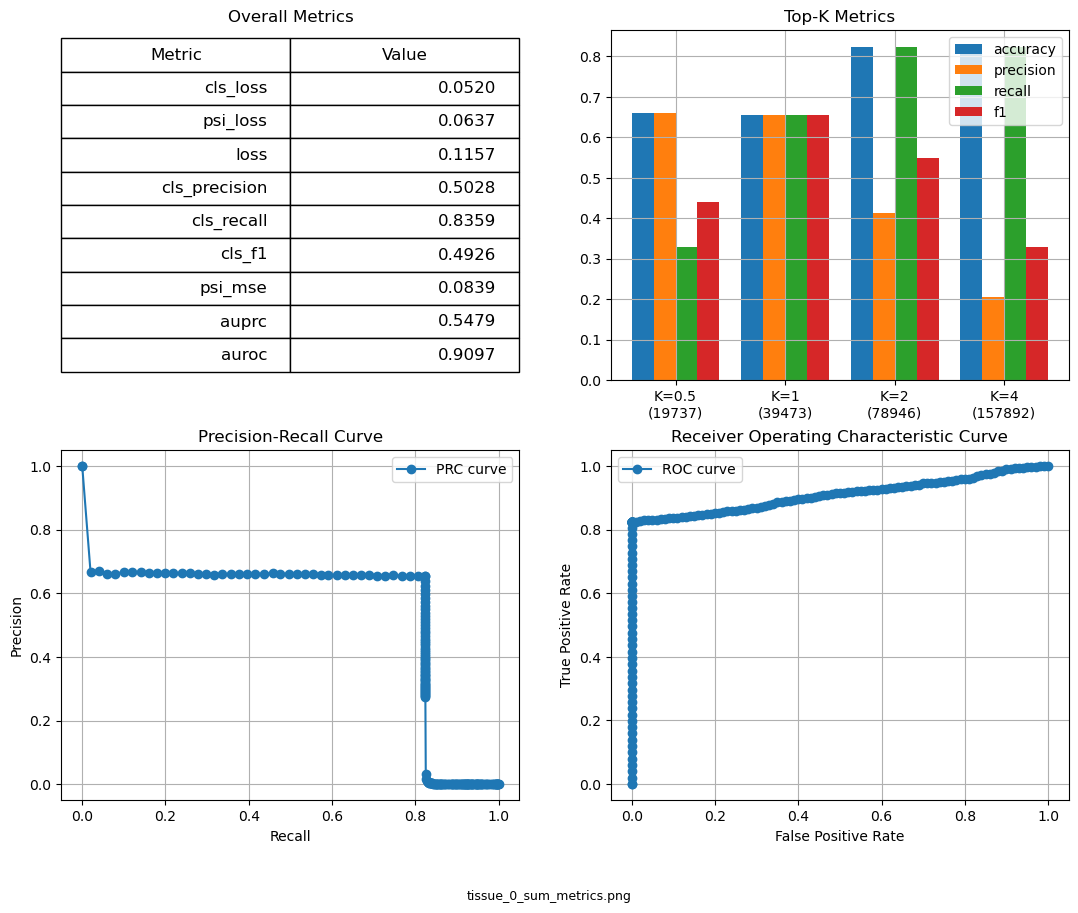

INFO 10/27 19:52:46 rank_zero.wrapped_fn.41: Calculating loss metrics...
INFO 10/27 19:52:48 rank_zero.wrapped_fn.41: Calculating eval metrics...
INFO 10/27 19:52:49 rank_zero.wrapped_fn.41: Calculating ROC and PRC metrics...


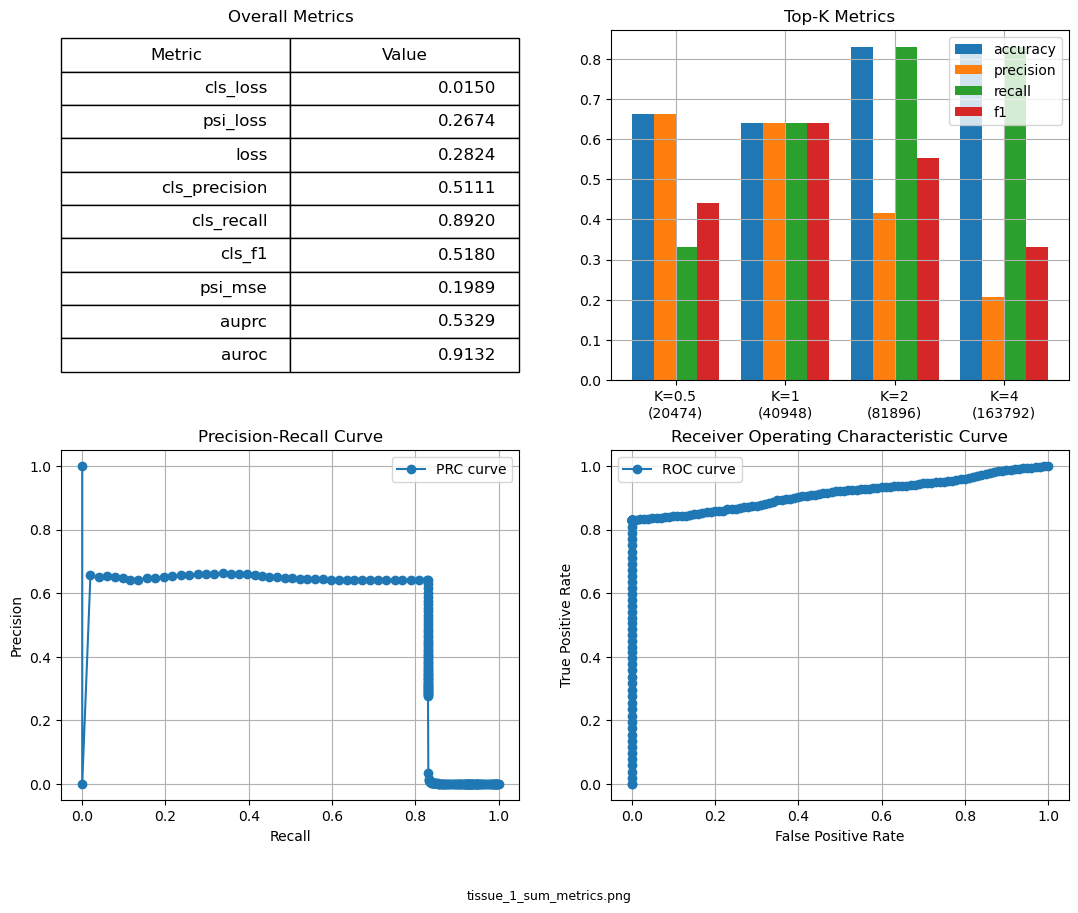

INFO 10/27 19:53:56 rank_zero.wrapped_fn.41: Calculating loss metrics...
INFO 10/27 19:53:58 rank_zero.wrapped_fn.41: Calculating eval metrics...
INFO 10/27 19:53:59 rank_zero.wrapped_fn.41: Calculating ROC and PRC metrics...


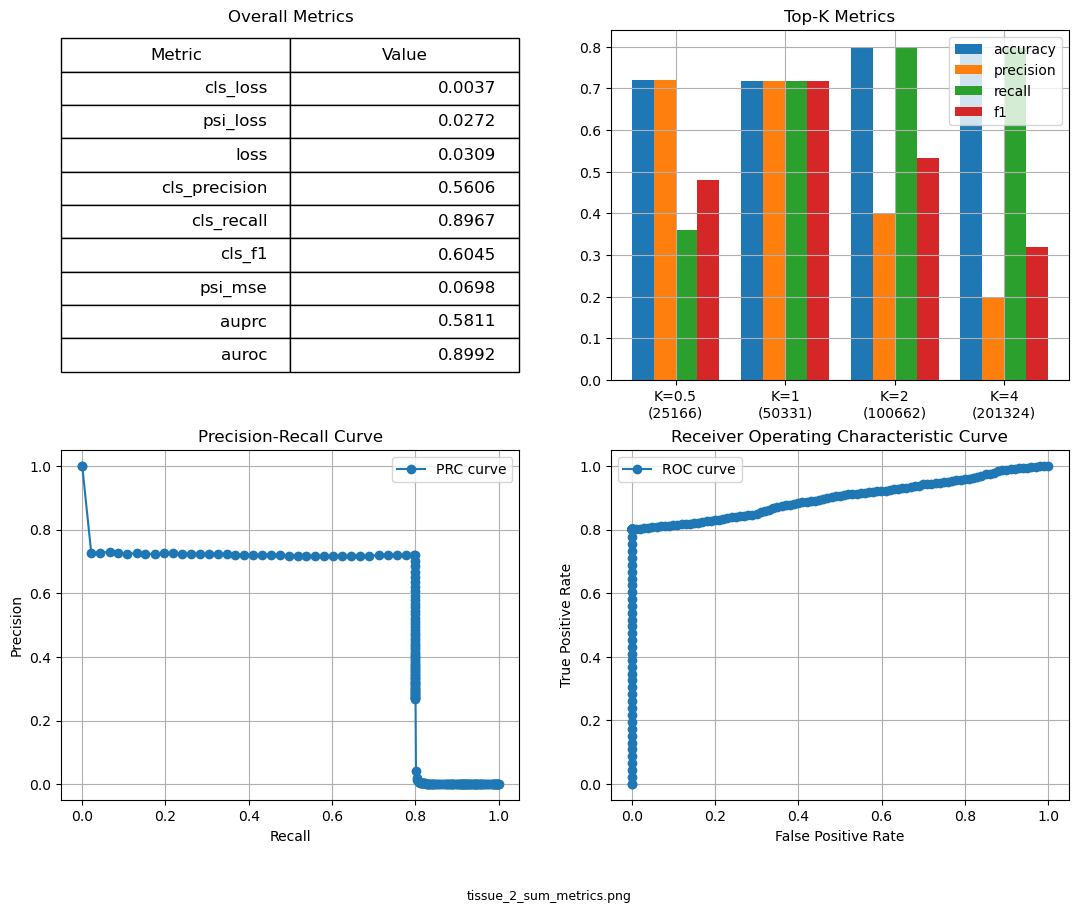

INFO 10/27 19:55:05 rank_zero.wrapped_fn.41: Calculating loss metrics...
INFO 10/27 19:55:07 rank_zero.wrapped_fn.41: Calculating eval metrics...
INFO 10/27 19:55:09 rank_zero.wrapped_fn.41: Calculating ROC and PRC metrics...


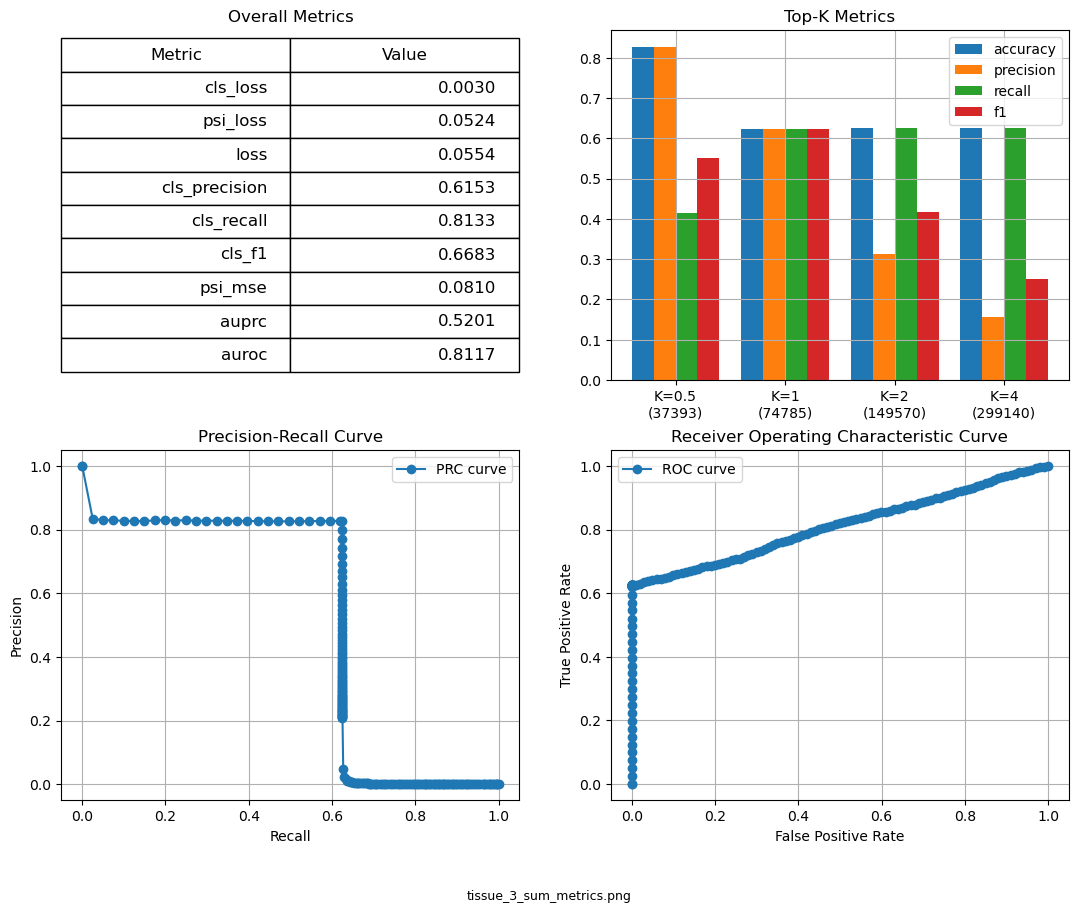

In [7]:
from AmbiSplice import loss_metrics
from AmbiSplice import visuals

for i in range(feats['cls'].shape[-2]):
    tissue_feats = feats.copy()
    tissue_feats['cls'] = tissue_feats['cls'][:, i, :]
    tissue_feats['psi'] = tissue_feats['psi'][:, i, :]

    tissue_preds = preds.copy()
    tissue_preds['cls_logits'] = tissue_preds['cls_logits'][:, :, i, :]
    tissue_preds['psi_logits'] = tissue_preds['psi_logits'][:, i, :]

    tissue_preds['cls'] = torch.nn.functional.softmax(tissue_preds['cls_logits'], dim=1)
    tissue_preds['psi'] = torch.nn.functional.sigmoid(tissue_preds['psi_logits'])

    tissue_metrics = loss_metrics.calc_benchmark(tissue_preds, tissue_feats, keep_batchdim=False)
    visuals.plot_sum_metrics(tissue_metrics, save_prefix=f"tissue_{i}_sum_metrics")